In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
import torchvision

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

### data preparation

In [ ]:
import torchvision.transforms as transforms

# Define data transforms
transform_train1 = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Lambda(lambda x: torch.cat([x, x, x], dim=0))
    ])

transform_test1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Lambda(lambda x: torch.cat([x, x, x], dim=0))
    ])

transform_train = transforms.Compose(
    [transforms.ToTensor(),
     transforms.CenterCrop(size=(28, 28)),
    ])

transform_test = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.CenterCrop(size=(28, 28)),
    ])

In [ ]:
train_set1 = torchvision.datasets.MNIST(root='./data1', train=True, download=True, transform=transform_train1)
test_set1 = torchvision.datasets.MNIST(root='./data1', train=False, download=True, transform=transform_test1)

100%|██████████| 9912422/9912422 [00:00<00:00, 100693425.54it/s]


Extracting ./data1/MNIST/raw/train-images-idx3-ubyte.gz to ./data1/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94859587.96it/s]


Extracting ./data1/MNIST/raw/train-labels-idx1-ubyte.gz to ./data1/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27014673.14it/s]


Extracting ./data1/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data1/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16158209.30it/s]


Extracting ./data1/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data1/MNIST/raw



In [ ]:
train_set2 = torchvision.datasets.SVHN(root='./data2', split='train', download=True, transform=transform_train)
test_set2 = torchvision.datasets.SVHN(root='./data2', split='test', download=True, transform=transform_test)

100%|██████████| 182040794/182040794 [00:09<00:00, 18232730.18it/s]


100%|██████████| 64275384/64275384 [00:03<00:00, 16845304.43it/s]


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
train_set_modified_idx1 = []
test_set_modified_idx1 = []

class_list_train=[0,0,0,0,0,0,0,0,0,0]
class_list_test=[0,0,0,0,0,0,0,0,0,0]

for i in range(len(train_set1)):
    images,classes = train_set1[i]

    if class_list_train[classes]<1000:
        class_list_train[classes]+=1
        train_set_modified_idx1.append(i)

for i in range(len(test_set1)):
    images,classes = test_set1[i]

    if class_list_test[classes]<500:
        class_list_test[classes]+=1
        test_set_modified_idx1.append(i)

In [ ]:
print(len(train_set_modified_idx1),len(test_set_modified_idx1))

10000 5000


In [ ]:
train_set11 = torch.utils.data.Subset(train_set1, [i for i in range(len(train_set1)) if i in train_set_modified_idx1])
test_set11 = torch.utils.data.Subset(test_set1, [i for i in range(len(test_set1)) if i in test_set_modified_idx1])

In [ ]:
train_set_modified_idx2 = []
test_set_modified_idx2 = []

class_list_train=[0,0,0,0,0,0,0,0,0,0]
class_list_test=[0,0,0,0,0,0,0,0,0,0]

for i in range(len(train_set2)):
    images,classes = train_set2[i]

    if class_list_train[classes]<1000:
        class_list_train[classes]+=1
        train_set_modified_idx2.append(i)

for i in range(len(test_set2)):
    images,classes = test_set2[i]

    if class_list_test[classes]<500:
        class_list_test[classes]+=1
        test_set_modified_idx2.append(i)

In [ ]:
train_set21 = torch.utils.data.Subset(train_set2, [i for i in range(len(train_set2)) if i in train_set_modified_idx2])
test_set21 = torch.utils.data.Subset(test_set2, [i for i in range(len(test_set2)) if i in test_set_modified_idx2])

5


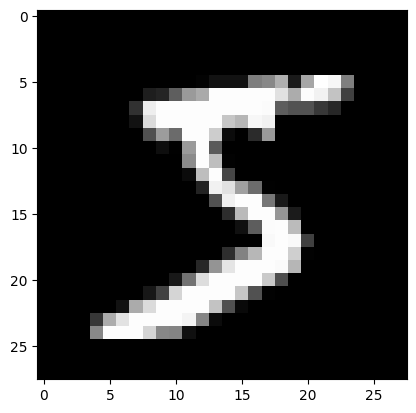

In [ ]:
imshow(train_set11[0][0])
print(train_set11[0][1])
# print(train_set11[0][0][0])

1


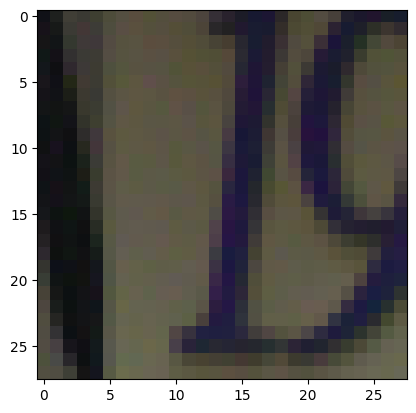

In [ ]:
imshow(train_set21[0][0])
print(train_set21[0][1])

In [ ]:
red = torch.tensor([1, 0, 0]).reshape(3, 1, 1)
green = torch.tensor([0, 1, 0]).reshape(3, 1, 1)
blue = torch.tensor([0, 0, 1]).reshape(3, 1, 1)
yellow = torch.tensor([1, 1, 0]).reshape(3, 1, 1)
cyan = torch.tensor([0, 1, 1]).reshape(3, 1, 1)
magenta = torch.tensor([1, 0, 1]).reshape(3, 1, 1)

# Choose a random color
color_choices = [red, blue, green, yellow, cyan, magenta]

In [ ]:
color_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)), # repeat grayscale image 3 times to get 3 channels

    transforms.Lambda(lambda x: x * color_choices[torch.randint(6, (1,))]), # making digit colour r,g,b or yellow

])

In [ ]:
train_set3 = torchvision.datasets.MNIST(root='./data3', train=True, download=True, transform=color_transform)
test_set3 = torchvision.datasets.MNIST(root='./data3', train=False, download=True, transform=color_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 99643401.94it/s]


Extracting ./data3/MNIST/raw/train-images-idx3-ubyte.gz to ./data3/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 96368889.28it/s]


Extracting ./data3/MNIST/raw/train-labels-idx1-ubyte.gz to ./data3/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27464066.61it/s]


Extracting ./data3/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data3/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6416479.88it/s]


Extracting ./data3/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data3/MNIST/raw



In [ ]:
train_set_modified_idx3 = []
test_set_modified_idx3 = []

class_list_train=[0,0,0,0,0,0,0,0,0,0]
class_list_test=[0,0,0,0,0,0,0,0,0,0]

for i in range(len(train_set3)):
    images,classes = train_set3[i]

    if class_list_train[classes]<1000:
        class_list_train[classes]+=1
        train_set_modified_idx3.append(i)

for i in range(len(test_set3)):
    images,classes = test_set3[i]

    if class_list_test[classes]<500:
        class_list_test[classes]+=1
        test_set_modified_idx3.append(i)

In [ ]:
print(len(train_set_modified_idx3),len(test_set_modified_idx3))

10000 5000


In [ ]:
train_set31 = torch.utils.data.Subset(train_set3, [i for i in range(len(train_set3)) if i in train_set_modified_idx3])
test_set31 = torch.utils.data.Subset(test_set3, [i for i in range(len(test_set3)) if i in test_set_modified_idx3])

0


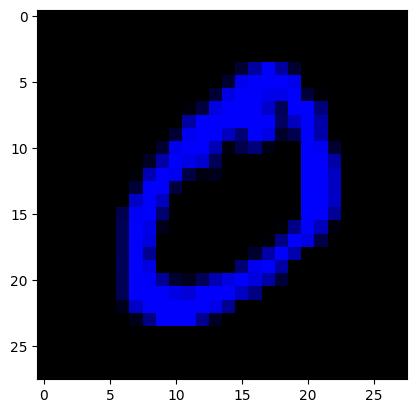

In [ ]:
imshow(train_set31[1][0])
print(train_set31[1][1])

9


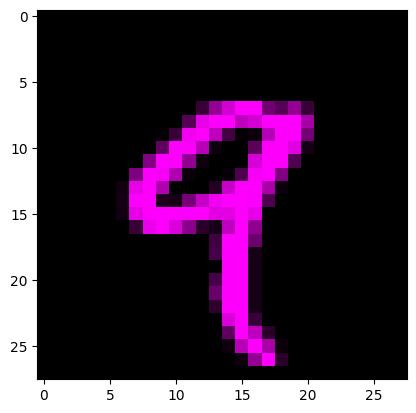

In [ ]:
imshow(train_set31[4][0])
print(train_set31[4][1])

### model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))                                        # Conv1, RelU with maxpool
        x = self.pool(F.relu(self.conv2(x)))                                        # Conv2, RelU with maxpool
        x = F.relu(self.conv3(x))                                                   # Conv3, RelU

        x = x.view(-1, 64*7*7)                                                      # Flatten tensor
        x = F.relu(self.fc1(x))                                                     # FC1, RelU
        x = self.fc2(x)                                                             # FC2
        return x

### (A)

Perform (0-9) digit classification task using federated setup by performing aggregation at the central server. 								            [20 Marks]



In [ ]:
central_server = CNN().to(device)
client1 = CNN().to(device)
client2 = CNN().to(device)
client3 = CNN().to(device)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_loader1 = torch.utils.data.DataLoader(train_set11, shuffle=True, batch_size=128)
test_loader1 = torch.utils.data.DataLoader(test_set11, shuffle=True, batch_size=128)
train_loader2 = torch.utils.data.DataLoader(train_set21, shuffle=True, batch_size=128)
test_loader2 = torch.utils.data.DataLoader(test_set21, shuffle=True, batch_size=128)
train_loader3 = torch.utils.data.DataLoader(train_set31, shuffle=True, batch_size=128)
test_loader3 = torch.utils.data.DataLoader(test_set31, shuffle=True, batch_size=128)

In [ ]:
from tqdm import tqdm, trange

In [ ]:
def train(model, epoch, tr_loader):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for batch_data in tqdm(tr_loader, desc=f"Epoch {epoch + 1} in training", leave=False):

        img = batch_data[0]
        labels = batch_data[1]
        img = img.to(device)
        labels = labels.to(device)
        output = model(img)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
for iterations in range(10):

    # list to hold client updates
    client_updates = []

    print(f"Training client1 at iteration = {iterations}")
    # loading central server parameters into model1
    client1.load_state_dict(central_server.state_dict())

    # training model1
    for epoch in range(5):
        train(client1,epoch,train_loader1)

    client_updates.append(client1.state_dict())


    print(f"Training client2 at iteration = {iterations}")
    # loading central server parameters into model2
    client2.load_state_dict(central_server.state_dict())

    # training model2
    for epoch in range(5):
        train(client2,epoch,train_loader2)

    client_updates.append(client2.state_dict())


    print(f"Training client3 at iteration = {iterations}")
    # loading central server parameters into model3
    client3.load_state_dict(central_server.state_dict())

    # training model3
    for epoch in range(5):
        train(client3,epoch,train_loader3)

    client_updates.append(client3.state_dict())



    # aggregate client updates using FedAvg
    avg_update = {}
    for key in client_updates[0].keys():
        avg_update[key] = torch.mean(torch.stack([client_updates[i][key] for i in range(len(client_updates))]), dim=0)

    # update central server with the average update
    central_server.load_state_dict(avg_update)

Training client1 at iteration = 0


Training client2 at iteration = 0


Training client3 at iteration = 0


Training client1 at iteration = 1


Training client2 at iteration = 1


Training client3 at iteration = 1


Training client1 at iteration = 2


Training client2 at iteration = 2


Training client3 at iteration = 2


Training client1 at iteration = 3


Training client2 at iteration = 3


Training client3 at iteration = 3


Training client1 at iteration = 4


Training client2 at iteration = 4


Training client3 at iteration = 4


Training client1 at iteration = 5


Training client2 at iteration = 5


Training client3 at iteration = 5


Training client1 at iteration = 6


Training client2 at iteration = 6


Training client3 at iteration = 6


Training client1 at iteration = 7


Training client2 at iteration = 7


Training client3 at iteration = 7


Training client1 at iteration = 8


Training client2 at iteration = 8


Training client3 at iteration = 8


Training client1 at iteration = 9


Training client2 at iteration = 9


Training client3 at iteration = 9


### (B)

Report the class-wise accuracy results for all three datasets at their respective client side and at the central server also. Report overall classification Accuracy and Confusion Matrix.   										            [20 Marks]


In [ ]:
import seaborn as sns

In [ ]:
def test1(model, epoch, te_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    class_correct = [0.0] * 10
    class_total = [0.0] * 10
    confusion_matrix = torch.zeros(10, 10)
    with torch.no_grad():
        for i, (img, labels) in enumerate(te_loader):
            img = img.to(device)
            labels = labels.to(device)

            output = model(img)
            _, predicted = output.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            for i in range(10):
                class_correct[i] += ((predicted == i) & (labels == i)).sum().item()
                class_total[i] += (labels == i).sum().item()

            for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

            test_loss += criterion(output, labels).item()

    test_loss /= len(te_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    print("Accuracy is:", 100. *correct/total, "%")

    for i in range(10):
        print('Accuracy of class %d : %2d %%' % (i, 100. * class_correct[i] / class_total[i]))

    print('Confusion Matrix:')

    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.show()

#### results for testset11: MNIST

client side

====> Test set loss: 0.0021
Accuracy is: 97.44 %
Accuracy of class 0 : 98 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 96 %
Accuracy of class 4 : 98 %
Accuracy of class 5 : 99 %
Accuracy of class 6 : 96 %
Accuracy of class 7 : 98 %
Accuracy of class 8 : 95 %
Accuracy of class 9 : 94 %
Confusion Matrix:


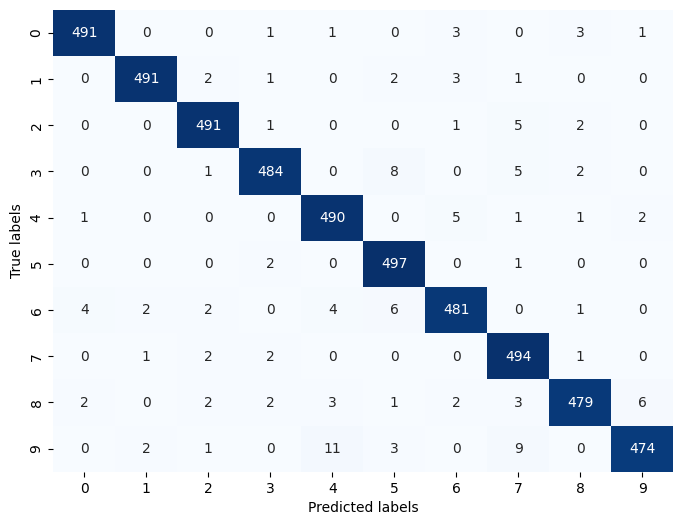

In [ ]:
test1(client1,epoch,test_loader1)

central server side

====> Test set loss: 0.0023
Accuracy is: 97.92 %
Accuracy of class 0 : 99 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 98 %
Accuracy of class 4 : 97 %
Accuracy of class 5 : 99 %
Accuracy of class 6 : 97 %
Accuracy of class 7 : 97 %
Accuracy of class 8 : 95 %
Accuracy of class 9 : 97 %
Confusion Matrix:


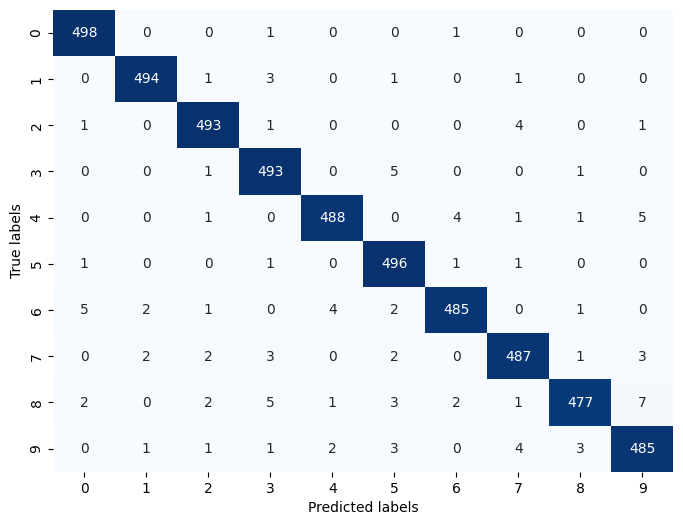

In [ ]:
test1(central_server,epoch,test_loader1)

#### results for testset21: SVHN

client side

====> Test set loss: 0.0110
Accuracy is: 80.7 %
Accuracy of class 0 : 84 %
Accuracy of class 1 : 82 %
Accuracy of class 2 : 82 %
Accuracy of class 3 : 72 %
Accuracy of class 4 : 80 %
Accuracy of class 5 : 84 %
Accuracy of class 6 : 76 %
Accuracy of class 7 : 85 %
Accuracy of class 8 : 78 %
Accuracy of class 9 : 82 %
Confusion Matrix:


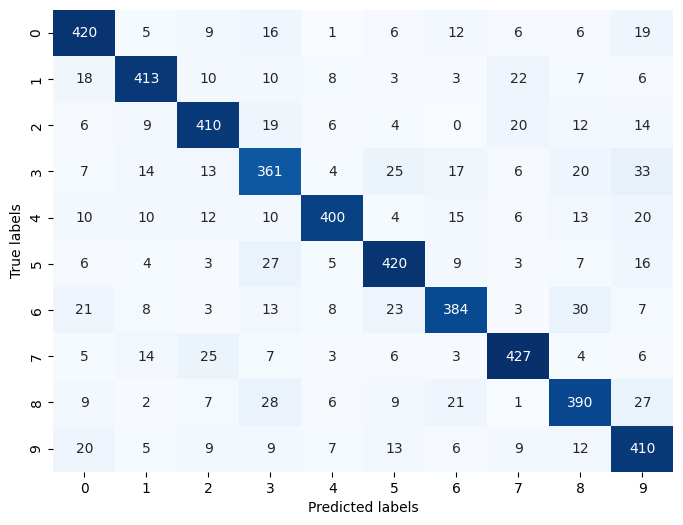

In [ ]:
test1(client2,epoch,test_loader2)

central server side

====> Test set loss: 0.0173
Accuracy is: 62.58 %
Accuracy of class 0 : 62 %
Accuracy of class 1 : 74 %
Accuracy of class 2 : 65 %
Accuracy of class 3 : 46 %
Accuracy of class 4 : 56 %
Accuracy of class 5 : 72 %
Accuracy of class 6 : 42 %
Accuracy of class 7 : 69 %
Accuracy of class 8 : 73 %
Accuracy of class 9 : 63 %
Confusion Matrix:


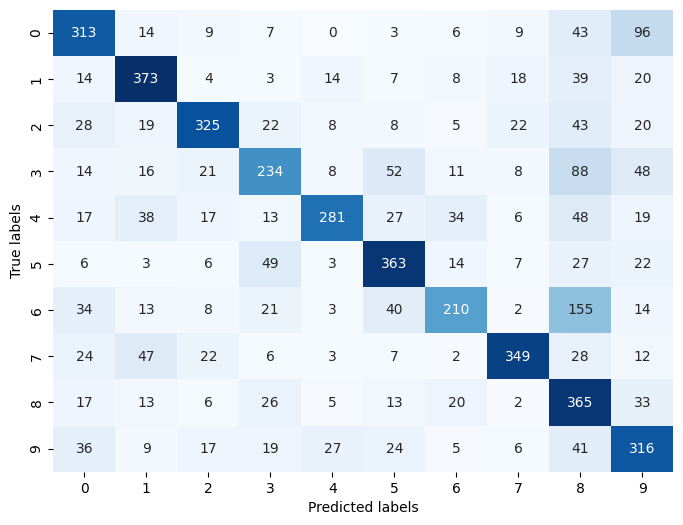

In [ ]:
test1(central_server,epoch,test_loader2)

#### results for testset31: Coloured MNIST

client side

====> Test set loss: 0.0021
Accuracy is: 97.18 %
Accuracy of class 0 : 99 %
Accuracy of class 1 : 99 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 97 %
Accuracy of class 4 : 97 %
Accuracy of class 5 : 98 %
Accuracy of class 6 : 95 %
Accuracy of class 7 : 96 %
Accuracy of class 8 : 94 %
Accuracy of class 9 : 95 %
Confusion Matrix:


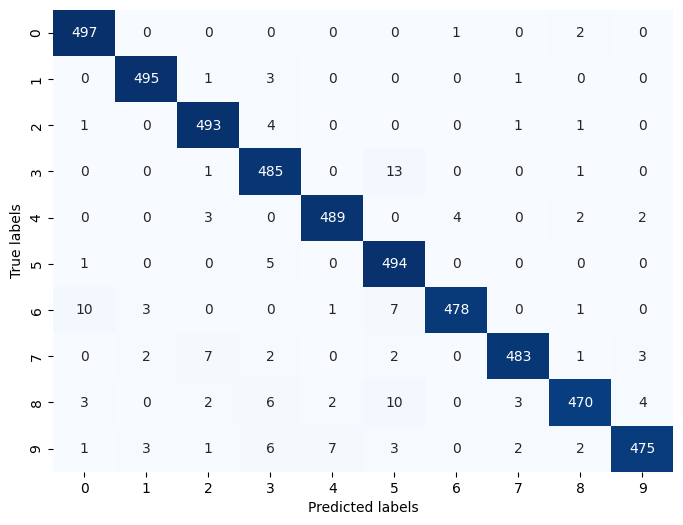

In [ ]:
test1(client3,epoch,test_loader3)

central server side

====> Test set loss: 0.0012
Accuracy is: 97.78 %
Accuracy of class 0 : 99 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 98 %
Accuracy of class 4 : 97 %
Accuracy of class 5 : 99 %
Accuracy of class 6 : 97 %
Accuracy of class 7 : 97 %
Accuracy of class 8 : 94 %
Accuracy of class 9 : 97 %
Confusion Matrix:


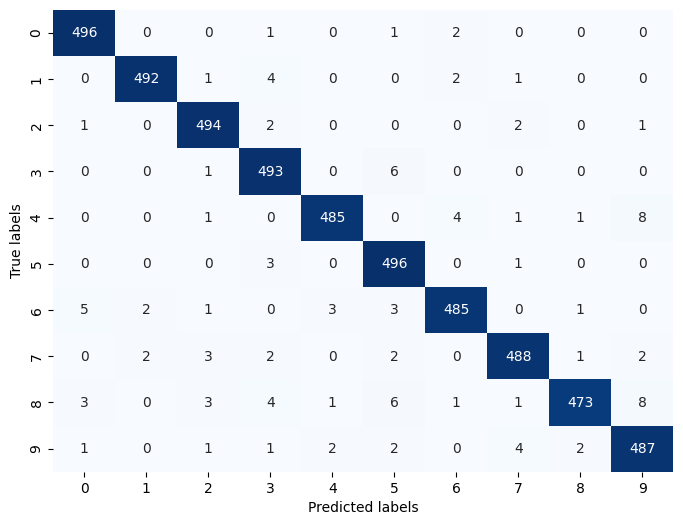

In [ ]:
test1(central_server,epoch,test_loader3)

#### overall results for all 3 test sets in central server

====> Test set loss: 0.0067
Accuracy is: 86.09333333333333 %
Accuracy of class 0 : 87 %
Accuracy of class 1 : 90 %
Accuracy of class 2 : 87 %
Accuracy of class 3 : 81 %
Accuracy of class 4 : 83 %
Accuracy of class 5 : 90 %
Accuracy of class 6 : 78 %
Accuracy of class 7 : 88 %
Accuracy of class 8 : 87 %
Accuracy of class 9 : 85 %
Confusion Matrix:


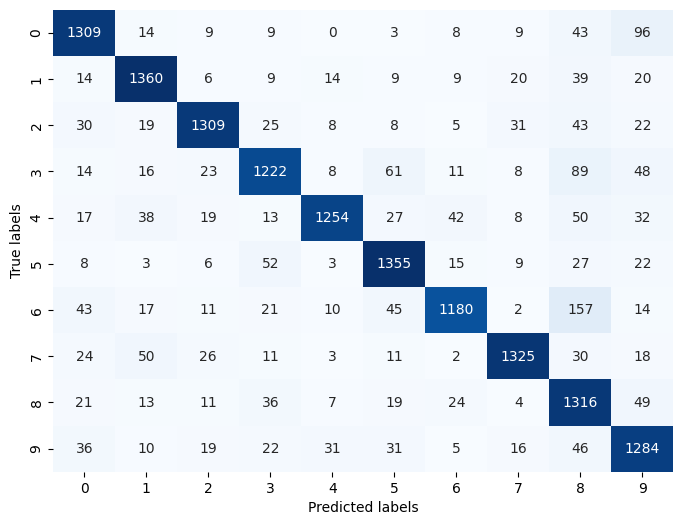

In [ ]:
test_loader_updated = torch.utils.data.DataLoader(test_set11 + test_set21 + test_set31, shuffle=True, batch_size=128)
test1(central_server,epoch,test_loader_updated)

### (E) training testing w/o FL

Compare the results of overall accuracy in federated setup with the baseline results calculated by combining all the datasets and training in non-federated setup. Do you observe any decrease/increase in accuracy for both the setups? State your answer with proper reasoning.                                  						            [20 Marks]

In [ ]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set11 + train_set21 + train_set31, shuffle=True, batch_size=128)
test_loader = torch.utils.data.DataLoader(test_set11 + test_set21 + test_set31, shuffle=True, batch_size=128)

tensor([0, 9, 7, 9])


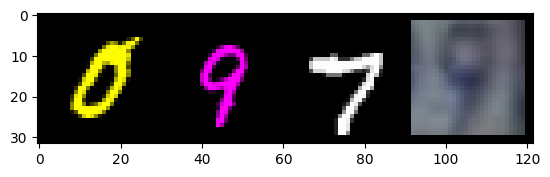

In [ ]:
for images, _ in train_loader:
  break

imshow(torchvision.utils.make_grid(images[:4]))

print(_[:4])

tensor([7, 0, 4, 4])


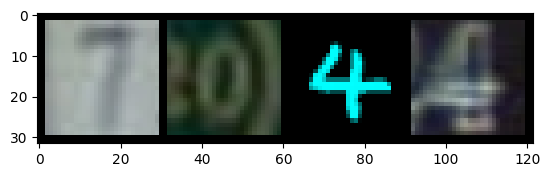

In [ ]:
for images, _ in test_loader:
  break

imshow(torchvision.utils.make_grid(images[:4]))
print(_[:4])

In [ ]:
import seaborn as sns

In [ ]:
def train1(model, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_data in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):

        img = batch_data[0]
        labels = batch_data[1]
        img = img.to(device)
        labels = labels.to(device)
        output = model(img)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(output, 1)
        # print(predicted)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    print("Accuracy is:", 100. * correct / total, "%")

    train_loss /= len(train_loader.dataset)
    train_losses1.append(train_loss)
    train_acc1.append(100. * correct / total)


def test1(model, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    class_correct = [0.0] * 10
    class_total = [0.0] * 10
    confusion_matrix = torch.zeros(10, 10)
    with torch.no_grad():
        for i, (img, labels) in enumerate(test_loader):
            img = img.to(device)
            labels = labels.to(device)

            output = model(img)
            _, predicted = output.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            for i in range(10):
                class_correct[i] += ((predicted == i) & (labels == i)).sum().item()
                class_total[i] += (labels == i).sum().item()

            for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

            test_loss += criterion(output, labels).item()

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    print("Accuracy is:", 100. *correct/total, "%")

    for i in range(10):
        print('Accuracy of class %d : %2d %%' % (i, 100. * class_correct[i] / class_total[i]))

    print('Confusion Matrix:')

    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.show()


In [ ]:
train_losses1=[]
train_acc1=[]

for epoch in range(10):
    train1(model,epoch)

====> Epoch: 0 Average loss: 0.0082
Accuracy is: 64.72 %


====> Epoch: 1 Average loss: 0.0039
Accuracy is: 84.34333333333333 %


====> Epoch: 2 Average loss: 0.0027
Accuracy is: 89.43 %


====> Epoch: 3 Average loss: 0.0021
Accuracy is: 91.82 %


====> Epoch: 4 Average loss: 0.0017
Accuracy is: 93.31666666666666 %


====> Epoch: 5 Average loss: 0.0015
Accuracy is: 94.07666666666667 %


====> Epoch: 6 Average loss: 0.0013
Accuracy is: 94.9 %


====> Epoch: 7 Average loss: 0.0011
Accuracy is: 95.59666666666666 %


====> Epoch: 8 Average loss: 0.0010
Accuracy is: 96.09333333333333 %


====> Epoch: 9 Average loss: 0.0009
Accuracy is: 96.39 %


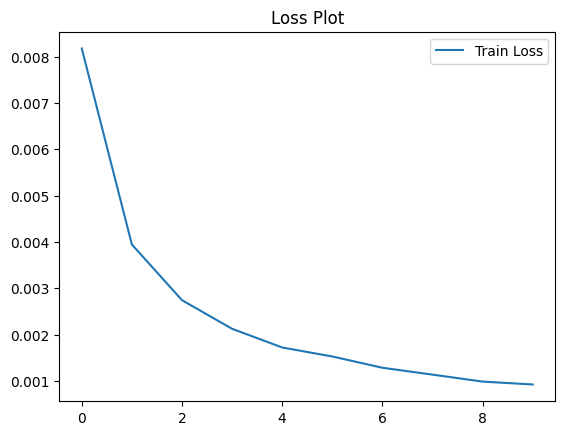

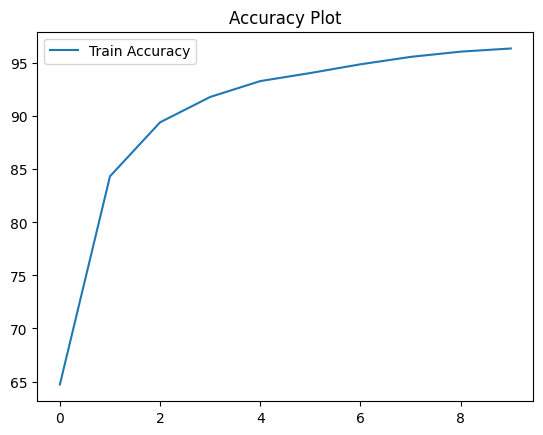

In [ ]:
plt.plot(train_losses1, label='Train Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

plt.plot(train_acc1, label='Train Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

====> Test set loss: 0.0029
Accuracy is: 91.56666666666666 %
Accuracy of class 0 : 95 %
Accuracy of class 1 : 94 %
Accuracy of class 2 : 92 %
Accuracy of class 3 : 89 %
Accuracy of class 4 : 92 %
Accuracy of class 5 : 91 %
Accuracy of class 6 : 85 %
Accuracy of class 7 : 95 %
Accuracy of class 8 : 88 %
Accuracy of class 9 : 90 %
Confusion Matrix:


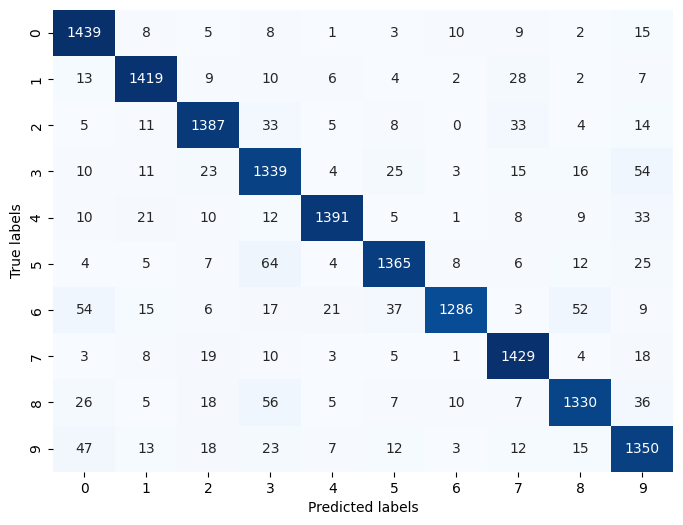

In [ ]:
test1(model,epoch)